# CASA0002_Urban simulation

luyang liu 20035801

part 1

In [287]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

1. Constructing the networks


1.1 From a shapefile to a graph:
A shapefile is a geospatial vector data format for storing geometric location and associated attribute information.

We are going to use the tube network shapefile called "underground.shp". This file has everything we need to construct the graph.

In [288]:
#OK, let us start with the shape file for London's underground

#Let's check the current working directory
os.getcwd()

'D:\\ucl\\urbanSimulation\\us\\Week_7_final'

In [374]:
# You need to set the working directory to where you have your shapefile data
os.chdir('D:\\ucl\\urbanSimulation\\us\\Week_7_final\\Underground')

# Let's create a graph from the shapefile
g_shp=nx.read_shp('underground.shp',geom_attrs=False) 

In [375]:
# We can print the dataframe from the shapefile to check the data

df = nx.to_pandas_edgelist(g_shp)
df[0:10]

,source,target,station_1,station_1_,ShpName,station_2_,toid_seq,distance,station_2
0,"(-0.1571, 51.5226)","(-0.1631, 51.5225)",11,Baker Street,underground,Marylebone,1,416.586050,163
1,"(-0.1571, 51.5226)","(-0.1466, 51.5234)",11,Baker Street,underground,Regent's Park,2,734.173636,212
2,"(-0.1571, 51.5226)","(-0.17, 51.5203)",11,Baker Street,underground,Edgware Road (C),171,931.211577,83
3,"(-0.1571, 51.5226)","(-0.1439, 51.5238)",11,Baker Street,underground,Great Portland Street,225,925.826411,104
4,"(-0.1571, 51.5226)","(-0.1494, 51.5142)",11,Baker Street,underground,Bond Street,197,1076.607648,28
5,"(-0.1571, 51.5226)","(-0.174, 51.5347)",11,Baker Street,underground,St. John's Wood,198,1785.442777,249
6,"(-0.1571, 51.5226)","(-0.1803, 51.5472)",11,Baker Street,underground,Finchley Road,226,3175.274183,94
7,"(-0.1247, 51.508)","(-0.1223, 51.5074)",49,Charing Cross,underground,Embankment,277,179.503418,87
8,"(-0.1247, 51.508)","(-0.1342, 51.5098)",49,Charing Cross,underground,Picadilly Circus,4,689.289845,197
9,"(-0.1247, 51.508)","(-0.1281, 51.5113)",49,Charing Cross,underground,Leicester Square,278,436.484594,151


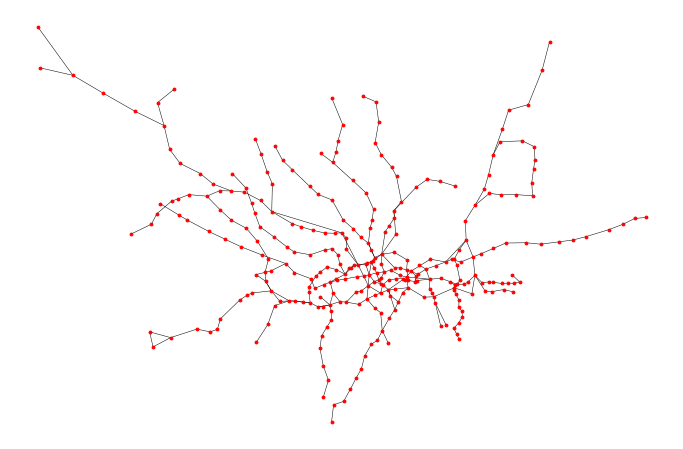

In [376]:
# Let's plot the tube network! 

# first we need to extract the coordinates from every node:
pos_shp = {xy: xy for xy in g_shp.nodes()}


fig, ax = plt.subplots(figsize=(12,8))
pos=pos_shp

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

In [377]:
#Let's give to the nodes the names of the stations:

nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
#for python 3.5 and greater:
nod_all = {**nod_st1, **nod_st2}

#for Python 2, (or 3.4 or lower):
# nod_all = nod_st1.copy()   
# nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# get the nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {'station': 'Baker Street'}),
 ((-0.1631, 51.5225), {'station': 'Marylebone'}),
 ((-0.1466, 51.5234), {'station': "Regent's Park"}),
 ((-0.1247, 51.508), {'station': 'Charing Cross'}),
 ((-0.1223, 51.5074), {'station': 'Embankment'}),
 ((-0.1342, 51.5098), {'station': 'Picadilly Circus'}),
 ((-0.1679, 51.5199), {'station': 'Edgware Road (B)'}),
 ((-0.1755, 51.5154), {'station': 'Paddington'}),
 ((-0.1001, 51.4943), {'station': 'Elephant & Castle'}),
 ((-0.1115, 51.4991), {'station': 'Lambeth North'})]

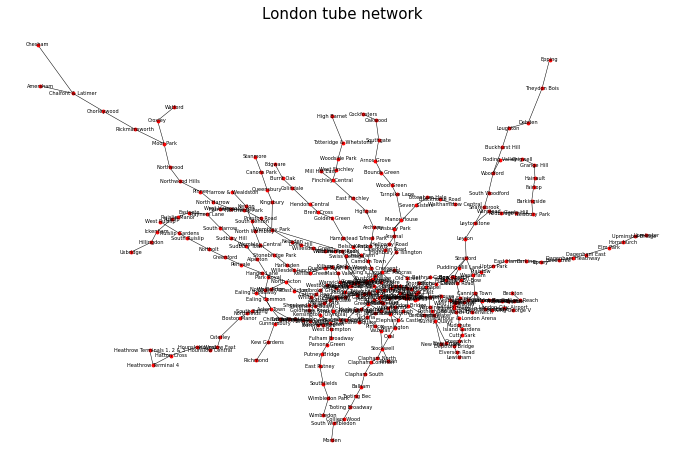

In [378]:
# We can plot the tube network with the names of the stations as labels

fig, ax = plt.subplots(figsize=(12,8))

node_labels = nx.get_node_attributes(g_shp, 'station')

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
nx.draw_networkx_labels(g_shp,pos, node_labels, font_size=5,font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [379]:
#do we want this graph to be a directed one?

# We can transform the type of graph from directed to undirected using the following function:
g_shp_un = g_shp.to_undirected()

In [380]:
import pandas as pd

In [381]:
# You need to set the working directory to where you have your .csv data
os.chdir('D:\\ucl\\urbanSimulation\\us\\Week_7_final')

# Read in the edge list file from the csv
edges_network = pd.read_csv("london_network.csv")
edges_network.head()

,station_1,station_2,distance
0,11,163,416.586050
1,11,212,734.173636
2,49,87,179.503418
3,49,197,689.289845
4,82,163,441.218104


In [382]:
# Read in the node list file from the csv
stations_network = pd.read_csv("london_stations.csv")
stations_network.head()

,id,station_name
0,1,Acton Town
1,2,Aldgate
2,3,Aldgate East
3,4,All Saints
4,5,Alperton


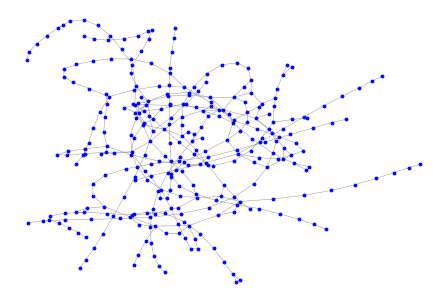

In [383]:
# Create graph object from the edge list
g_csv = nx.from_pandas_edgelist(edges_network, 'station_1', 'station_2',['distance'])

# Plot graph
nx.draw(g_csv,
        node_color='b',
        node_size=8,
        edge_color='gray',
        width=0.4)

In [384]:
#To extract the coordinates from the shapefile network, we need first to check how do we need to store it: 
list(g_csv.nodes(data=True))[0:10]

# In this case, the nodes from the csv network are named using the "id number" from each station.
# This value correspond to the 'station_1' and 'station_2' attributes in the shapefile. 
# We need a dictionary with the "id number" and the coordinates.

[(11, {}),
 (163, {}),
 (212, {}),
 (49, {}),
 (87, {}),
 (197, {}),
 (82, {}),
 (193, {}),
 (84, {}),
 (148, {})]

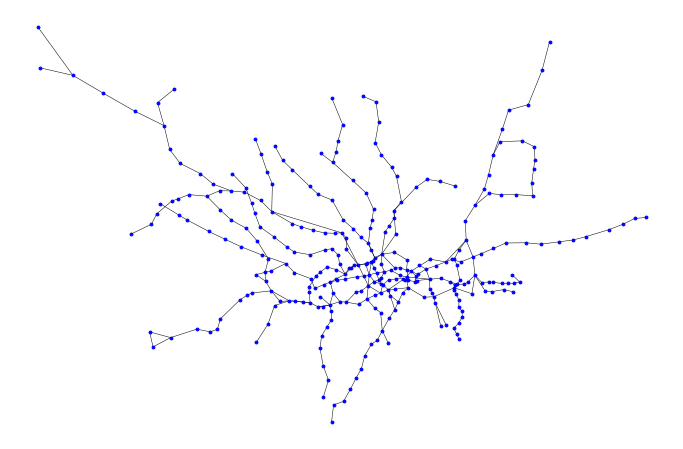

In [385]:
# From the shapefile network:

nod_id1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1')}
nod_id2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2')}

#for python 3.5 and greater:
nod_id = {**nod_id1, **nod_id2}

#for Python 2, (or 3.4 or lower):
# nod_id = nod_id1.copy()
# nod_id.update(nod_id2)


nx.set_node_attributes(g_shp,nod_id,'station_id')
node_id_dict={(node['station_id']):(i) for i, node in g_shp.nodes(data=True)}


# Now that we have the coordinates, we can use them to plot the csv network! :)

pos = node_id_dict

fig, ax = plt.subplots(figsize=(12,8))
nx.draw_networkx_nodes(g_csv,pos,node_size=8,node_color='b')
nx.draw_networkx_edges(g_csv,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

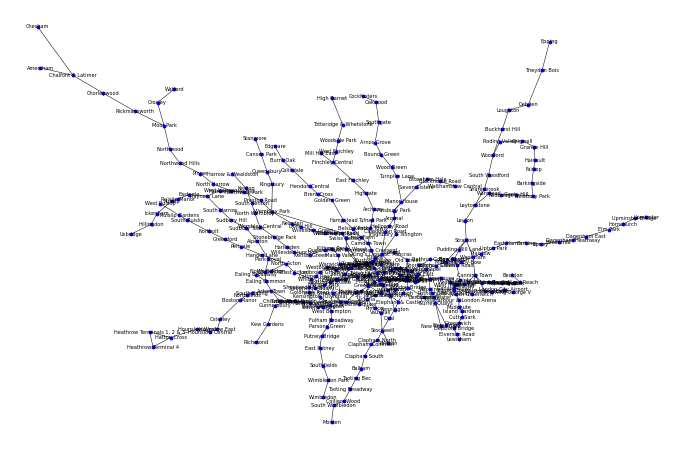

In [386]:
#Lets plot the station names now! 
st_name = stations_network.set_index('id').to_dict('index').items()
nx.set_node_attributes(g_csv,dict(st_name))


pos = node_id_dict
node_labels = nx.get_node_attributes(g_csv, 'station_name')
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_labels(g_csv,pos, node_labels, font_size=5,font_color='black')
nx.draw_networkx_nodes(g_csv,pos,node_size=8,node_color='b')
nx.draw_networkx_edges(g_csv,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

In [387]:
list(g_csv.edges(data=True))[0:10]

[(11, 163, {'distance': 416.586050414}),
 (11, 212, {'distance': 734.173636158}),
 (11, 83, {'distance': 931.21157741}),
 (11, 104, {'distance': 925.82641098}),
 (11, 28, {'distance': 1076.607648078}),
 (11, 249, {'distance': 1785.442777083}),
 (11, 94, {'distance': 3175.274183309}),
 (163, 82, {'distance': 441.218104132}),
 (212, 192, {'distance': 999.366517556}),
 (49, 87, {'distance': 179.503417688})]

In [388]:
# We can add the stations id number as attributes to the edges:
nod_id1={(e1,e2):(e1) for e1, e2 in g_csv.edges()}
nx.set_edge_attributes(g_csv,nod_id1,'station_1')

nod_id2={(e1,e2):(e2) for e1, e2 in g_csv.edges()}
nx.set_edge_attributes(g_csv,nod_id2,'station_2')

# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(g_csv.nodes[e1]['station_name']) for e1, e2 in g_csv.edges()}
nod_name2={(e1,e2):(g_csv.nodes[e2]['station_name']) for e1, e2 in g_csv.edges()}

nx.set_edge_attributes(g_csv,nod_name1,'station_1_')
nx.set_edge_attributes(g_csv,nod_name2,'station_2_')



list((g_csv.edges(data=True)))[0]

(11,
 163,
 {'distance': 416.586050414,
  'station_1': 11,
  'station_2': 163,
  'station_1_': 'Baker Street',
  'station_2_': 'Marylebone'})

In [389]:
# have we ended up with the same graphs?
# We can check this by using the nx.is_isomorphic() function. 
# Isomorphic graphs have the same number of graph vertices connected in the same way.
    
nx.is_isomorphic(g_shp_un, g_csv)  # no weights considered

True

## 3. Centrality measures

### Betweenness

In [390]:
### Weighted betweenness centrality:

#Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(g_shp_un, weight='distance',normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,bet_london_w,'betweenness_w')


pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')[0:20]

,betweenness_w
"(-0.1571, 51.5226)",13194.0
"(-0.1631, 51.5225)",5894.0
"(-0.1466, 51.5234)",0.0
"(-0.1247, 51.508)",3273.0
"(-0.1223, 51.5074)",3353.0
"(-0.1342, 51.5098)",2711.0
"(-0.1679, 51.5199)",5745.0
"(-0.1755, 51.5154)",6632.0
"(-0.1001, 51.4943)",1454.0
"(-0.1115, 51.4991)",356.0


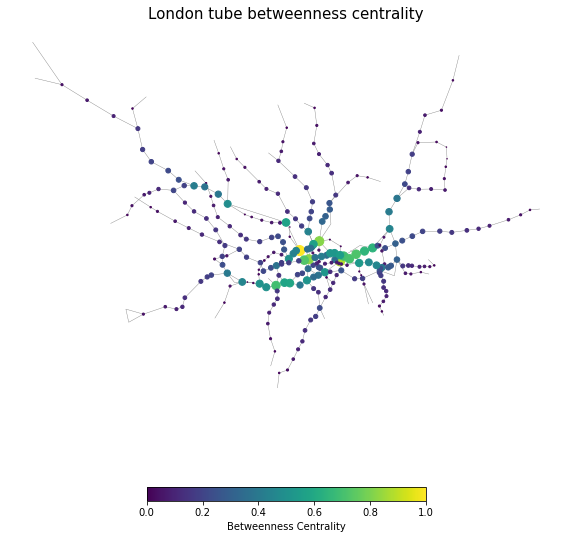

In [391]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in g_shp_un.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in g_shp_un.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values)*100) for i in g_shp_un.nodes(data=True)]


# Plot graph

pos=pos_shp

fig, ax = plt.subplots(figsize=(10,10))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

## closeness

In [392]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(g_shp_un, distance='distance')
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,clos_w,'closeness_w')

pd.DataFrame.from_dict(clos_w,columns=['closeness_w'],orient='index')[0:10]

,closeness_w
"(-0.1571, 51.5226)",0.000086
"(-0.1631, 51.5225)",0.000084
"(-0.1466, 51.5234)",0.000085
"(-0.1247, 51.508)",0.000088
"(-0.1223, 51.5074)",0.000088
"(-0.1342, 51.5098)",0.000088
"(-0.1679, 51.5199)",0.000083
"(-0.1755, 51.5154)",0.000080
"(-0.1001, 51.4943)",0.000080
"(-0.1115, 51.4991)",0.000083


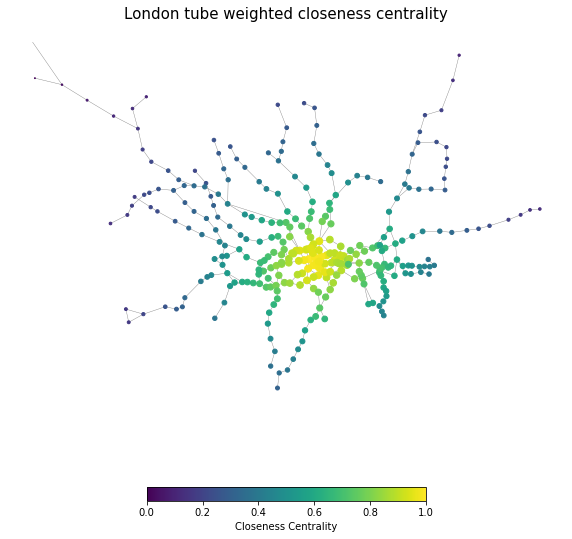

In [393]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in g_shp_un.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in g_shp_un.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in g_shp_un.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,10))

nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

### Degree centrality

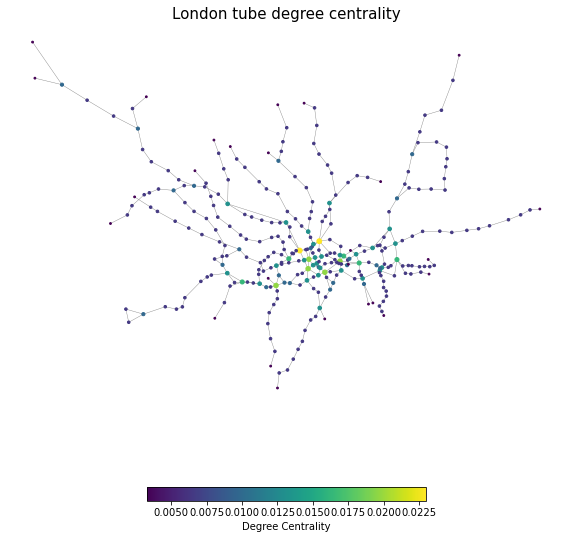

In [394]:
test =nx.degree_centrality(g_shp_un)
nx.set_node_attributes(g_shp_un,dict(test),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in g_shp_un.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in g_shp_un.nodes(data=True)]


fig, ax = plt.subplots(figsize=(10,10))
pos=pos_shp

nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title('London tube degree centrality',fontsize=15)
plt.show()


#Note that values now go from 0 to 1

In [329]:
#g_shp_un_bs=g_shp_un.copy()
#g_shp_un_bus=g_shp_un.copy()

# deepcopy
g_shp_un_bs=copy.deepcopy(g_shp_un)
g_shp_un_bus=copy.deepcopy(g_shp_un)
g_shp_un_cs=copy.deepcopy(g_shp_un)
g_shp_un_cus=copy.deepcopy(g_shp_un)
g_shp_un_ds=copy.deepcopy(g_shp_un)
g_shp_un_dus=copy.deepcopy(g_shp_un)

In [311]:
import copy

### removal nodes

unsequential remove

### betweenness centrality

In [314]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_un=dict(g_shp_un_bus.nodes(data=True))

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_w'],reverse=True))
list(listbet_un.items())[:10]
top_betweenness=list(listbet_un.items())[:10]

In [315]:
list_betweeness_top=[]
for i in top_betweenness:
    list_betweeness_top.append(i[0])
list_betweeness_top

[(-0.1571, 51.5226),
 (-0.0886, 51.5133),
 (-0.1415, 51.515),
 (-0.1238, 51.5308),
 (-0.1494, 51.5142),
 (-0.0612, 51.5194),
 (-0.0726, 51.5154),
 (-0.1973, 51.492),
 (-0.0823, 51.5178),
 (-0.047, 51.5221)]

In [316]:
# Existing nodes:
l1=list(g_shp_un.nodes)
len(l1)
sequential_betweeness=g_shp_un_bus.remove_nodes_from(list_betweeness_top)
l2=list(g_shp_un_bus.nodes)
len(l2)

296

In [317]:
nodes_removal=pd.DataFrame(columns=('nonseq-Betweenness','nonseq-Closeness','nonseq-Degree','seq-Betweenness','seq-Closeness',
                          'seq-Degree'))
non_B=[]
non_C=[]
non_D=[]
on_B=[]
on_C=[]
on_D=[]
for i in list_betweeness_top:
    non_B.append(g_shp_un.nodes[i]['station'])
for i in list_closeness_top:
    non_C.append(g_shp_un.nodes[i]['station'])
for i in se_B:
    on_B.append(g_shp_un.nodes[i]['station'])
for i in list_degree_top:
    non_D.append(g_shp_un.nodes[i]['station'])
for i in se_C:
    on_C.append(g_shp_un.nodes[i]['station'])
for i in se_D:
    on_D.append(g_shp_un.nodes[i]['station'])
nodes_removal['nonseq-Betweenness']=non_B
nodes_removal['nonseq-Closeness']=non_C
nodes_removal['nonseq-Degree']=non_D
nodes_removal['seq-Betweenness']=on_B
nodes_removal['seq-Closeness']=on_C
nodes_removal['seq-Degree']=on_D
nodes_removal

ValueError: Length of values (0) does not match length of index (10)

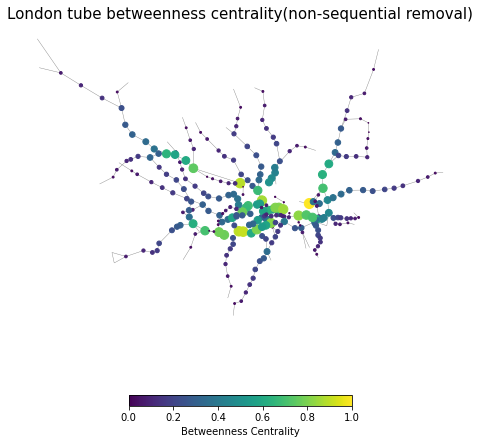

In [318]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in g_shp_un_bus.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in g_shp_un_bus.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values)*100) for i in g_shp_un_bus.nodes(data=True)]


# Plot graph

pos=pos_shp

fig, ax = plt.subplots(figsize=(8,8))


nx.draw_networkx_edges(g_shp_un_bus, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un_bus,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality(non-sequential removal)",fontsize=15)
plt.show()

### closeness centrality

In [319]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_cc=dict(g_shp_un_cus.nodes(data=True))

#Pyhton3:
from collections import OrderedDict
listbet_cc=OrderedDict(sorted(dict_bet_cc.items(), key=lambda x: x[1]['closeness_w'],reverse=True))
list(listbet_cc.items())[:10]
top_closeness=list(listbet_cc.items())[:10]
list_closeness_top=[]
for i in top_closeness:
    list_closeness_top.append(i[0])
list_closeness_top

[(-0.1415, 51.515),
 (-0.131, 51.5165),
 (-0.1342, 51.5098),
 (-0.12, 51.5174),
 (-0.1281, 51.5113),
 (-0.1494, 51.5142),
 (-0.1428, 51.5067),
 (-0.1247, 51.508),
 (-0.1223, 51.5074),
 (-0.1243, 51.5129)]

In [320]:
# Existing nodes:
l1=list(g_shp_un.nodes)
len(l1)
sequential_closeness=g_shp_un_cus.remove_nodes_from(list_closeness_top)
l2=list(g_shp_un_cus.nodes)
len(l2)

296

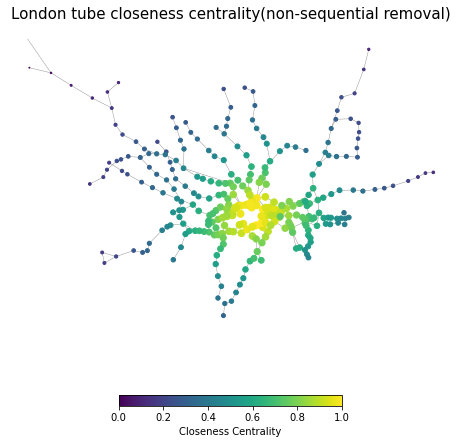

In [321]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in g_shp_un_cus.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in g_shp_un_cus.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in g_shp_un_cus.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(8,8))

nx.draw_networkx_edges(g_shp_un_cus, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un_cus,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality(non-sequential removal)",fontsize=15)
plt.show()

### degree centrality

In [322]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_dc=dict(g_shp_un_dus.nodes(data=True))

#Pyhton3:
from collections import OrderedDict
listbet_dc=OrderedDict(sorted(dict_bet_dc.items(), key=lambda x: x[1]['degree_norm'],reverse=True))
list(listbet_dc.items())[:10]
top_degree=list(listbet_dc.items())[:10]
list_degree_top=[]
for i in top_degree:
    list_degree_top.append(i[0])
list_degree_top

[(-0.1571, 51.5226),
 (-0.1238, 51.5308),
 (-0.1143, 51.5036),
 (-0.1415, 51.515),
 (-0.0886, 51.5133),
 (-0.1973, 51.492),
 (-0.1428, 51.5067),
 (-0.1755, 51.5154),
 (-0.0823, 51.5178),
 (-0.2547, 51.4951)]

In [323]:
sequential_degree=g_shp_un_dus.remove_nodes_from(list_degree_top)
l2=list(g_shp_un_dus.nodes)
len(l2)

296

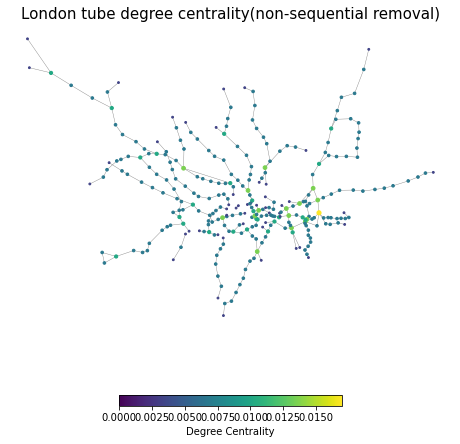

In [324]:
test =nx.degree_centrality(g_shp_un_dus)


nx.set_node_attributes(g_shp_un_dus,dict(test),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in g_shp_un_dus.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in g_shp_un_dus.nodes(data=True)]


fig, ax = plt.subplots(figsize=(8,8))
pos=pos_shp

nx.draw_networkx_edges(g_shp_un_dus, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un_dus,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title('London tube degree centrality(non-sequential removal)',fontsize=15)
plt.show()


#Note that values now go from 0 to 1

### sequence

In [395]:
g_shp_un_bs=copy.deepcopy(g_shp_un)
g_shp_un_cs=copy.deepcopy(g_shp_un)
g_shp_un_ds=copy.deepcopy(g_shp_un)

### betweeness

In [366]:
print(nx.info(g_csv))
print(max(bet_london_w))
top_betweenness=list(listbet_un.items())[:1]
print(top_betweenness[0][1]['betweenness_w'])
print(max(bet_london_w.values()))
print(max(bet_london_w))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072
(0.251, 51.559)
13194.0
13194.0
(0.251, 51.559)


In [367]:
se_B=[]
for i in range(10):
    a = nx.get_node_attributes(g_shp_un_bs, 'betweenness_w')
    for n in g_shp_un_bs: 
        if a[(n)] == max(bet_london_w.values()):
            g_shp_un_bs.remove_node(n)
            bet_london_w=nx.betweenness_centrality(g_shp_un_bs,weight='distance',normalized=False)
            print(n)
            print(nx.global_efficiency(g_shp_un_bs))
            largest_cc_bs = max(nx.connected_components(g_shp_un_bs), key=len)
            print(len(largest_cc_bs))
            se_B.append(n)
            nx.set_node_attributes(g_shp_un_bs, bet_london_w, 'betweenness_w')
            break

(-0.1571, 51.5226)
0.09255207934263272
305
(-0.1973, 51.492)
0.08535915494634556
295
(-0.1967, 51.5094)
0.06562044388455769
192
(-0.1238, 51.5308)
0.05776494370654513
172
(-0.0886, 51.5133)
0.05383212011350759
171
(-0.1223, 51.5074)
0.05264450034025263
170
(-0.0502, 51.4982)
0.041215152233509134
102
(-0.2882, 51.5101)
0.03654869848152088
94
(-0.0042, 51.5416)
0.03262644521550563
73
(-0.1428, 51.5067)
0.02888665635092203
73


In [368]:
l1=list(g_shp_un_bs.nodes)
len(l1)

296

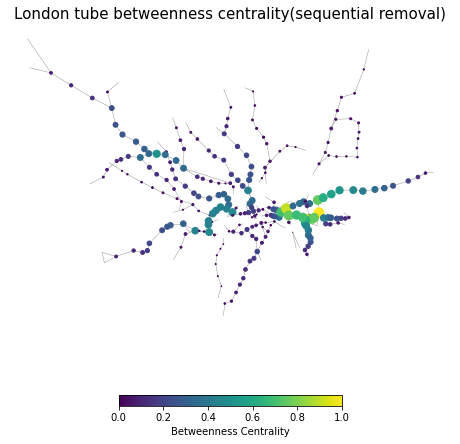

In [78]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in g_shp_un_bs.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in g_shp_un_bs.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values)*100) for i in g_shp_un_bs.nodes(data=True)]


# Plot graph

pos=pos_shp

fig, ax = plt.subplots(figsize=(8,8))


nx.draw_networkx_edges(g_shp_un_bs, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un_bs,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality(sequential removal)",fontsize=15)
plt.show()

### closeness

In [396]:
se_C=[]
for i in range(10):
    a = nx.get_node_attributes(g_shp_un_cs, 'closeness_w')
    for n in g_shp_un_cs: 
        #print('an: ' + str(a[(n)]))
        #print('max_bet: ' + str(max(bet_london_w.values())))
        if a[(n)] == max(clos_w.values()):
            g_shp_un_cs.remove_node(n)
            print(n)
            print(nx.global_efficiency(g_shp_un_cs))
            largest_cc_cs = max(nx.connected_components(g_shp_un_cs), key=len)
            print(len(largest_cc_cs))
            se_C.append(n)
            clos_w=nx.closeness_centrality(g_shp_un_cs, distance='distance')
            nx.set_node_attributes(g_shp_un_cs,clos_w,'closeness_w')
            break

(-0.1415, 51.515)
0.10075594955562597
305
(-0.1342, 51.5098)
0.10023049229742917
304
(-0.1254, 51.501)
0.09663830144494655
303
(-0.1238, 51.5308)
0.08216855076935571
285
(-0.123, 51.4723)
0.057407881886075894
142
(-0.0612, 51.5194)
0.05657331213160102
140
(-0.0886, 51.5133)
0.05366593999323096
139
(-0.0203, 51.507)
0.053301250806382185
138
(0.0056, 51.5287)
0.048982341314688926
132
(-0.1223, 51.5074)
0.044355347554120926
132


In [339]:
l1=list(g_shp_un_cs.nodes)
len(l1)

296

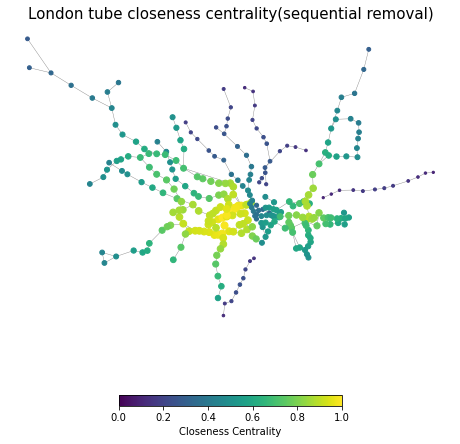

In [82]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in g_shp_un_cs.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in g_shp_un_cs.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in g_shp_un_cs.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(8,8))

nx.draw_networkx_edges(g_shp_un_cs, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un_cs,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality(sequential removal)",fontsize=15)
plt.show()

### degree centrality

In [373]:
se_D=[]
for i in range(10):
    a = nx.get_node_attributes(g_shp_un_ds, 'degree_norm')
    for n in g_shp_un_ds: 
        if a[(n)] == max(test.values()):
            g_shp_un_ds.remove_node(n)
            print(n)
            print(nx.global_efficiency(g_shp_un_ds))
            largest_cc_ds = max(nx.connected_components(g_shp_un_ds), key=len)
            print(len(largest_cc_ds))
            se_D.append(n)
            test =nx.degree_centrality(g_shp_un_ds)
            nx.set_node_attributes(g_shp_un_ds,test,'degree_norm')
            break

(-0.1571, 51.5226)
0.09255207934263272
305
(-0.1238, 51.5308)
0.08254382342255565
285
(-0.1143, 51.5036)
0.07857408050096772
284
(-0.1415, 51.515)
0.07584604231801019
282
(-0.1973, 51.492)
0.06948732134732832
272
(-0.1755, 51.5154)
0.06373013527925066
255
(-0.0886, 51.5133)
0.06020717999479834
254
(-0.2547, 51.4951)
0.05589074220740818
239
(-0.1428, 51.5067)
0.05435589203339149
238
(0.0082, 51.5147)
0.04888131710370269
225


In [371]:
l1=list(g_shp_un_ds.nodes)
len(l1)

296

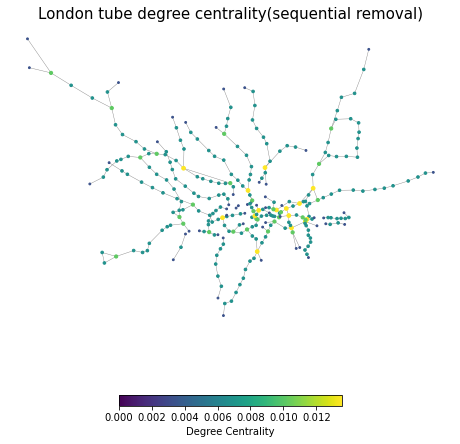

In [81]:
test =nx.degree_centrality(g_shp_un_ds)


nx.set_node_attributes(g_shp_un_ds,dict(test),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in g_shp_un_ds.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in g_shp_un_ds.nodes(data=True)]


fig, ax = plt.subplots(figsize=(8,8))
pos=pos_shp

nx.draw_networkx_edges(g_shp_un_ds, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un_ds,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title('London tube degree centrality(sequential removal)',fontsize=15)
plt.show()


#Note that values now go from 0 to 1

## measures

### efficiency measure

In [262]:
print("Global efficiency")
print(nx.global_efficiency(g_shp_un))
print(nx.global_efficiency(g_shp_un_bus))
print(nx.global_efficiency(g_shp_un_bs))
print(nx.global_efficiency(g_shp_un_cus))
print(nx.global_efficiency(g_shp_un_cs))
print(nx.global_efficiency(g_shp_un_dus))
print(nx.global_efficiency(g_shp_un_ds))
print("Local efficiency")
print(nx.local_efficiency(g_shp_un))
print(nx.local_efficiency(g_shp_un_bus))
print(nx.local_efficiency(g_shp_un_bs))
print(nx.local_efficiency(g_shp_un_cus))
print(nx.local_efficiency(g_shp_un_cs))

Global efficiency
0.1021247523344587
0.06375903651842804
0.1021247523344587
0.09445237409105889
0.1021247523344587
0.05626002174356237
0.1021247523344587
Local efficiency
0.032570806100217876
0.02424242424242424
0.032570806100217876
0.027721661054994386
0.032570806100217876


In [204]:
nx.local_efficiency(g_shp_un_bus)

0.024406779661016946

In [263]:
largest_cc_bus = max(nx.connected_components(g_shp_un_bus), key=len)
print(len(largest_cc_bus))
largest_cc_bs = max(nx.connected_components(g_shp_un_bs), key=len)
print(len(largest_cc_bs))
largest_cc = max(nx.connected_components(g_shp_un), key=len)
print(len(largest_cc))

262
306
306


In [264]:
largest_cc_cus = max(nx.connected_components(g_shp_un_cus), key=len)
print(len(largest_cc_cus))
largest_cc_cs = max(nx.connected_components(g_shp_un_cs), key=len)
print(len(largest_cc_cs))

296
306


In [265]:
largest_cc_dus = max(nx.connected_components(g_shp_un_dus), key=len)
print(len(largest_cc_dus))
largest_cc_ds = max(nx.connected_components(g_shp_un_ds), key=len)
print(len(largest_cc_ds))

247
306


In [155]:
#biggest components:
bus_components=261/306
bs_components=73/306
cus_components=296/306
cs_components=132/306
dus_components=232/306
ds_components=225/306
print(bus_components)
print(bs_components)
print(cus_components)
print(cs_components)
print(dus_components)
print(ds_components)

0.8529411764705882
0.238562091503268
0.9673202614379085
0.43137254901960786
0.7581699346405228
0.7352941176470589


In [194]:
shortest_length=nx.average_shortest_path_length(g_shp_un, method=None)
efficient=(1/shortest_length)
efficient

0.07078820424137618

In [111]:
for C in (g_shp_un_bs.subgraph(c).copy() for c in nx.connected_components(g_shp_un_bs)):
    print(nx.average_shortest_path_length(C))

10.5010101010101
7.519230769230769
6.163440860215053
9.2720700152207
4.821052631578947
4.384615384615385
1.0
0
3.0
1.3333333333333333
7.9105691056910565
4.794117647058823


In [112]:
for C in (g_shp_un_bus.subgraph(c).copy() for c in nx.connected_components(g_shp_un_bus)):
    print(nx.average_shortest_path_length(C))

21.062452107279693
0
1.0
2.0
0
3.0
0
4.794117647058823


In [209]:
from itertools import permutations
def global_efficiency_weighted(G):
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        shortest_paths = nx.all_pairs_dijkstra(G, weight = 'distance')
        g_eff = sum(1./shortest_paths[u][0][v] if shortest_paths[u][0][v] !=0 else 0 for u, v in permutations(G, 2)) / denom
    else:
        g_eff = 0
    return g_eff
global_efficiency_weighted(g_shp_un_bus)

TypeError: 'generator' object is not subscriptable

### part 2

#### section 1

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
# You need to set the working directory to where you have your shapefile data
os.chdir('D:\\ucl\\urbanSimulation\\us\\TubeCommuters_Practical\\underground\\')

# Let's create a graph from the shapefile
g_shp=nx.read_shp('underground.shp',geom_attrs=False)

# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(g_shp)
df[0:10]

,source,target,station_2,toid_seq,distance,ShpName,station_2_,station_1_,station_1
0,"(-0.1571, 51.5226)","(-0.1631, 51.5225)",163,1,416.586050,underground,Marylebone,Baker Street,11
1,"(-0.1571, 51.5226)","(-0.1466, 51.5234)",212,2,734.173636,underground,Regent's Park,Baker Street,11
2,"(-0.1571, 51.5226)","(-0.17, 51.5203)",83,171,931.211577,underground,Edgware Road (C),Baker Street,11
3,"(-0.1571, 51.5226)","(-0.1439, 51.5238)",104,225,925.826411,underground,Great Portland Street,Baker Street,11
4,"(-0.1571, 51.5226)","(-0.1494, 51.5142)",28,197,1076.607648,underground,Bond Street,Baker Street,11
5,"(-0.1571, 51.5226)","(-0.174, 51.5347)",249,198,1785.442777,underground,St. John's Wood,Baker Street,11
6,"(-0.1571, 51.5226)","(-0.1803, 51.5472)",94,226,3175.274183,underground,Finchley Road,Baker Street,11
7,"(-0.1247, 51.508)","(-0.1223, 51.5074)",87,277,179.503418,underground,Embankment,Charing Cross,49
8,"(-0.1247, 51.508)","(-0.1342, 51.5098)",197,4,689.289845,underground,Picadilly Circus,Charing Cross,49
9,"(-0.1247, 51.508)","(-0.1281, 51.5113)",151,278,436.484594,underground,Leicester Square,Charing Cross,49


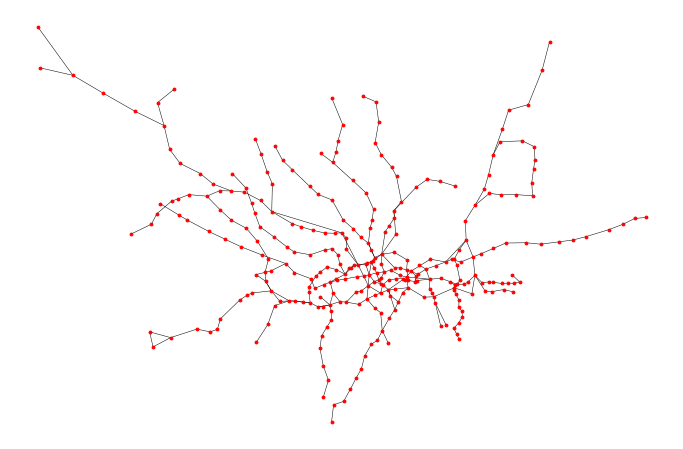

In [131]:
# Let's plot the tube network:

# first we need to extract the coordinates from every node:
pos = {xy: xy for xy in g_shp.nodes()}

fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

In [133]:
#Finally, we will give an ID to each node(station), such that it will be easier later to call them:
#1.Create a new attribute with node coordinates (now coord are the keys and we do not want to lose that information
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')
list(g_shp_un.nodes(data=True))[0:10]
#2.now relabel each node with an ordered integer:
node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)
list(g_shp_un.nodes(data=True))[0:10]
#Later when using the Commuters data we will have an issue mapping node 'Heathrow Terminals 1, 2 & 3', 
#so we are going to rename it here:
#1. find the node 'Heathrow Terminals 1, 2 & 3'
nodes = [(x,y) for x,y in g_shp_un.nodes(data='station') if 'Heathrow' in str(y)]
nodes
#2.Rename it with the name given by the the commuters file (see later):
g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

[('Acton Town', {'station': 'Acton Town'}), ('Alperton', {'station': 'Alperton'}), ('Amersham', {'station': 'Amersham'}), ('Angel', {'station': 'Angel'}), ('Archway', {'station': 'Archway'}), ('Arsenal', {'station': 'Arsenal'}), ('Baker Street', {'station': 'Baker Street'}), ('Bank', {'station': 'Bank'}), ('Barbican', {'station': 'Barbican'}), ('Barons Court', {'station': 'Barons Court'})]
[(111, {'station': 'Acton Town'}), (238, {'station': 'Alperton'}), (172, {'station': 'Amersham'}), (196, {'station': 'Angel'}), (198, {'station': 'Archway'}), (244, {'station': 'Arsenal'}), (0, {'station': 'Baker Street'}), (25, {'station': 'Bank'}), (77, {'station': 'Barbican'}), (100, {'station': 'Barons Court'})]


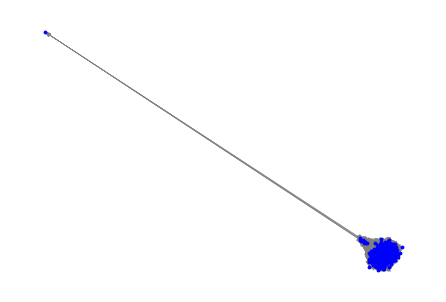

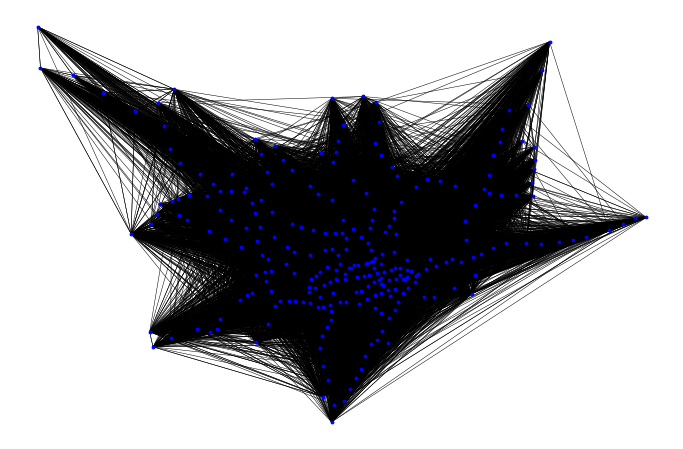

In [136]:
import pandas as pd
#First, we read the csv file with commuting flows starting and ending between stations, called Origin-Destination:
#Check you are in the correct directory to read the csv 
os.chdir('D:\\ucl\\urbanSimulation\\us\\TubeCommuters_Practical\\')
# Read Origin-Destination table from the csv
orig_dest = pd.read_csv('ODtube2017.csv')
orig_dest.head(10)
#This can be seen as a network by itself:
g_OD = nx.from_pandas_edgelist(orig_dest, 'station_name', 'station_name.1',['total_wtrips'],create_using=nx.MultiDiGraph)

# Plot graph
nx.draw(g_OD,
        node_color='b',
        node_size=8,
        edge_color='gray',
        width=0.4)
#Change the names of nodes by the id in g_shp_un (tube network):

#1.Copy name as an attribute:
nod_names={(e1):e1 for e1 in g_OD.nodes()}
nx.set_node_attributes(g_OD,nod_names,'station') #with nod_id1 or nod_id2 is enought
print(list(g_OD.nodes(data=True))[:10])
#2.Do the mapping with id in g_shp_un
mapping = {g_shp_un.nodes[i]['station']:i for i in g_shp_un.nodes()}
g_OD = nx.relabel_nodes(g_OD, mapping)
print(list(g_OD.nodes(data=True))[:10])
#and we can add coodenates to the nodes, from the shapefile of the tube network:
nod_coords={(e1):coord for e1, coord in g_shp_un.nodes(data='station_coord')}

nx.set_node_attributes(g_OD,nod_coords,'station_coord') #with nod_id1 or nod_id2 is enought

pos = {e1: xy for e1,xy in g_OD.nodes(data='station_coord')}
#To finaly plot the OD matrix as a network:
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_OD,g_OD.nodes(data='station_coord'),node_size=8,node_color='b')
nx.draw_networkx_edges(g_OD,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

In [137]:
#Now, let's create the network with the actual flow of commuters travelling between each pair of stations,
#regardless which was their origin and destination:

#We will create that graph using the adjacency matrix method that was presented in previous practicals:
#First we create an empty adjacency matrix:
N=len(g_shp_un.nodes()) #As we are going to use shortest path in the tube network, N is from g_shp_un
adj_c=np.zeros((N, N))

#Fill the adjacency matrix with Origin-Destination flows:
#From origin to destination with x commuters, we will compute the shortest path and fill the number of commuters
#for each pair of stations they go through:
for e1,e2,C in g_OD.edges(data='total_wtrips'):
    path = nx.dijkstra_path(g_shp_un,e1,e2)  #shortest path e1,e2 taking into account distance weights in g_shp_un
    path_edges = list(zip(path,path[1:])) #list of tuples with shortest path edges [(e1,s2),(s3,s4),...,(s(n-1),e2)]
    for (s1,s2) in path_edges:
            adj_c[s1,s2]=adj_c[s1,s2]+C #sum the contribution of the OD flow to all edges in the shortest path
adj_c

array([[    0., 15400., 36470., ...,     0.,     0.,     0.],
       [15035.,     0.,     0., ...,     0.,     0.,     0.],
       [19675.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

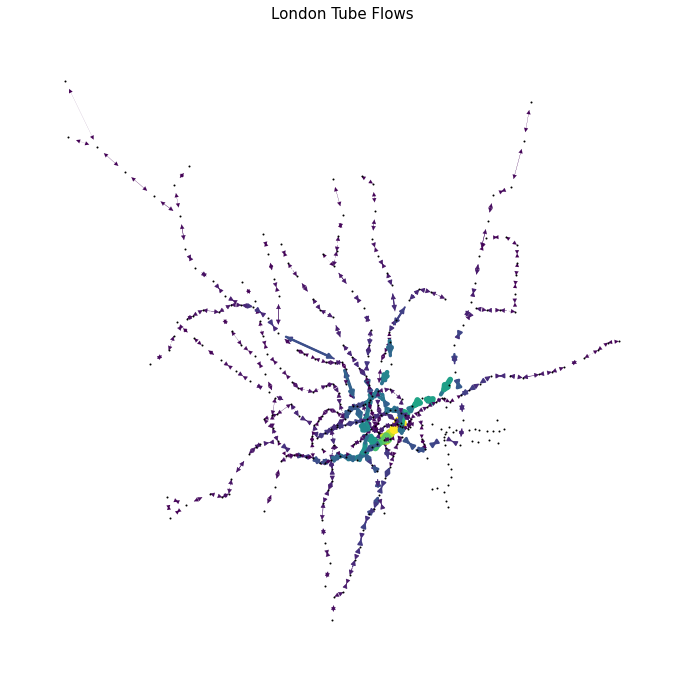

In [138]:
#Create the new graph from the adjancency matrix:
g_flows=nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)
#we need to give coordinates to these nodes too:
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
list(g_flows.nodes(data=True))[0:10]
#also the station names:
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
nx.set_node_attributes(g_flows,nod_names,'station')
list(g_flows.nodes(data=True))[0:10]
# Lets set colour and size of nodes according to the flows_
weights = [w for e1,e2,w in g_flows.edges(data='weight')]

weights_color=[(w/max(weights)) for e1,e2,w in g_flows.edges(data='weight')]
weights_size=[(w/max(weights)*10) for e1,e2,w in g_flows.edges(data='weight')]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = {e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows, pos,edge_color=weights_color, width=weights_size)

nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("London Tube Flows",fontsize=15)
plt.show()

#this are the directed flows in the tube network!

#### impact of flows

In [186]:
l1=g_shp_un.nodes
l2=g_shp_un_bs.nodes
list(set(l1) - set(l2))

[(-0.1571, 51.5226),
 (-0.1973, 51.492),
 (-0.1428, 51.5067),
 (-0.0886, 51.5133),
 (-0.1238, 51.5308),
 (-0.2882, 51.5101),
 (-0.0042, 51.5416),
 (-0.1967, 51.5094),
 (-0.1223, 51.5074),
 (-0.0502, 51.4982)]

In [206]:
print(g_shp_un.nodes[(-0.1571, 51.5226)]['station'])
print(g_shp_un.nodes[(-0.1973, 51.492)]['station'])
print(g_shp_un.nodes[(-0.1428, 51.5067)]['station'])
print(g_shp_un.nodes[(-0.0886, 51.5133)]['station'])
print(g_shp_un.nodes[(-0.1238, 51.5308)]['station'])
print(g_shp_un.nodes[(-0.2882, 51.5101)]['station'])
print(g_shp_un.nodes[(-0.0042, 51.5416)]['station'])
print(g_shp_un.nodes[(-0.1967, 51.5094)]['station'])
print(g_shp_un.nodes[(-0.1223, 51.5074)]['station'])
print(g_shp_un.nodes[(-0.0502, 51.4982)]['station'])

Baker Street
Earl's Court
Green Park
Bank
King's Cross St. Pancras
Ealing Common
Stratford
Notting Hill Gate
Embankment
Canada Water


In [268]:
#or if you do not know how exacly it is written:
node2 = [(x,y) for x,y in g_flows.nodes(data='station') if 'Earl' in str(y)]
print(node2)

[(116, "Earl's Court")]


In [274]:
BakerStreet = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Baker' in str(y)]
print(BakerStreet)
EarlsCourt = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Earl' in str(y)]
print(EarlsCourt)
GreenPark = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Green Park' in str(y)]
print(GreenPark)
Bank = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Bank' in str(y)]
print(Bank)
KingsCross = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'St. Pancras' in str(y)]
print(KingsCross)
EalingCommon = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Ealing Common' in str(y)]
print(EalingCommon)
Stratford = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Stratford' in str(y)]
print(Stratford)
NottingHillGate = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Notting' in str(y)]
print(NottingHillGate)
Embankment = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Embankment' in str(y)]
print(Embankment)
CanadaWater = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Canada' in str(y)]
print(CanadaWater)

[(0, 1), (0, 2), (0, 33), (0, 75), (0, 76), (0, 152), (0, 165), (1, 0), (2, 0), (33, 0), (75, 0), (76, 0), (152, 0), (165, 0)]
[(89, 116), (90, 116), (100, 116), (102, 116), (116, 89), (116, 90), (116, 100), (116, 102), (116, 117), (116, 118), (118, 116)]
[(5, 155), (24, 155), (33, 155), (86, 155), (93, 155), (155, 5), (155, 24), (155, 33), (155, 86), (155, 93), (155, 256), (256, 155)]
[(10, 25), (25, 10), (25, 26), (25, 27), (25, 79), (25, 143), (25, 154), (26, 25), (27, 25), (79, 25), (143, 25), (154, 25)]
[(78, 88), (87, 88), (88, 78), (88, 87), (88, 196), (88, 215), (88, 251), (88, 261), (88, 273), (196, 88), (215, 88), (251, 88), (261, 88), (273, 88)]
[(45, 115), (111, 115), (115, 45), (115, 111), (115, 255), (255, 115)]
[(32, 66), (64, 66), (66, 32), (66, 64), (66, 109), (109, 66)]
[(59, 60), (60, 59), (60, 63), (60, 80), (60, 90), (63, 60), (80, 60), (90, 60)]
[(3, 4), (4, 3), (4, 10), (4, 83), (4, 86), (10, 4), (83, 4), (86, 4)]
[(137, 138), (137, 153), (137, 156), (138, 137), 

In [310]:
def flowcounts(station):
    b =[]
    count=[]
    for a in station:
        b.append(g_flows.edges[a])
    for i in b:
        count.append(i['weight'])
    return count

[17550.0, 31528.0, 29374.0, 38735.0, 25505.0, 46768.0, 33530.0, 33146.0]

In [312]:
print(flowcounts(BakerStreet))
print(flowcounts(EarlsCourt))
print(flowcounts(GreenPark))
print(flowcounts(Bank))
print(flowcounts(KingsCross))
print(flowcounts(EalingCommon))
print(flowcounts(Stratford))
print(flowcounts(NottingHillGate))
print(flowcounts(Embankment))
print(flowcounts(CanadaWater))

[15400.0, 36470.0, 122309.0, 100026.0, 71061.0, 12433.0, 77391.0, 15035.0, 19675.0, 110221.0, 92259.0, 77971.0, 13692.0, 108261.0]
[82918.0, 31039.0, 87674.0, 3983.0, 115308.0, 15020.0, 78045.0, 3160.0, 398.0, 33634.0, 38403.0]
[11198.0, 132371.0, 164007.0, 192829.0, 173704.0, 19575.0, 169746.0, 160819.0, 181974.0, 122513.0, 11843.0, 10686.0]
[310784.0, 344094.0, 176270.0, 52743.0, 75014.0, 11761.0, 118743.0, 211706.0, 38967.0, 100776.0, 9937.0, 126864.0]
[105419.0, 69531.0, 135949.0, 79977.0, 20064.0, 122952.0, 9387.0, 29256.0, 128879.0, 16326.0, 148448.0, 13693.0, 18997.0, 158264.0]
[11543.0, 20622.0, 11496.0, 23723.0, 8941.0, 11535.0]
[136954.0, 82964.0, 193727.0, 58631.0, 81892.0, 97662.0]
[59399.0, 49665.0, 53606.0, 24292.0, 41757.0, 41965.0, 42318.0, 25326.0]
[17550.0, 31528.0, 29374.0, 38735.0, 25505.0, 46768.0, 33530.0, 33146.0]
[999.0, 83199.0, 75799.0, 339.0, 85329.0, 67560.0]


In [313]:
sum(flowcounts(BakerStreet))

872204.0